# Analysis of the copulation events
Here, the copulation latency and the fraction of copulating pairs is analyzed.

Author: Bjarne Schultze <br>
Last modified: 29.11.2024

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb

import modules.plotting_utils as myplt
import modules.data_handling_utils as dutils

plt.style.use('./plotstyle_bjarne.mplstyle')

In [ ]:
main_path = "E:/res/"
metadata_path = "./accessory_files/metadata.pkl"

# Define colors
vib_col = to_rgb("#46A81F")   # '#46A81F'
pulse_col = to_rgb("#ff0000")  # '#5D11AD' 
sine_col = to_rgb("#2d7cff")  # '#F07236'  
cmap = ListedColormap([np.array([1.0,1.0,1.0]),sine_col,pulse_col,vib_col])

# Load metadata file (first five files with different protocol are missing)
metadata = pd.read_pickle(metadata_path)

In [ ]:
cop_ratios = []
cop_times = []

for exp_grp, genotype in zip(["TN1A", "vPR13", "vMS12-SS3", "pIP10"], ["TN1A_CsChrimson", "vPR13_CsChrimson", 
                                                                       "vMS12-SS3_CsChrimson", "CsChrimson; VT40556"]):
    # Get experiment names
    exp = metadata.loc[metadata["genotype"] == genotype, :]
    experiments_mf = exp.loc[exp["individuals.1"] == "1", "filename"].to_list()

    # Get annotations
    annotations_mf = dutils.load_annotations_simple(experiments_mf, main_path=main_path)

    # Get copulation times and logical list indicating if there was a copulation
    copulation = [ True for ann in annotations_mf if sum(ann["name"]=="start_copulation") > 0 ]
    copulation_times = [ ann.loc[ann["name"]=="start_copulation", "start_seconds"].values for ann in annotations_mf if sum(ann["name"]=="start_copulation") > 0 ]

    cop_ratios.append(f"{sum(copulation)}/{len(experiments_mf)}")
    cop_times.append(np.concatenate(copulation_times) / 60 )    # min

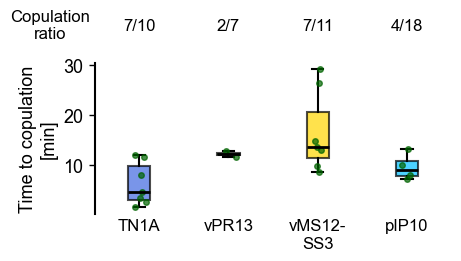

In [8]:
# Set up a new figure
fig, ax = plt.subplots(1, 1, figsize=(4.5,2.5))

# Plot the times until copulation
myplt.boxplot_dp(cop_times, labels=["TN1A", "vPR13", "vMS12-\nSS3", "pIP10"], boxcolor=["royalblue", "forestgreen", "gold", "deepskyblue"],
                 markeralpha=0.7, markercolor="darkgreen", markersize=4, ax=ax)

# Add text for the copulation ratios
ax.text(0, 38, "Copulation\nratio", ha="center", va="center", fontsize=12)
for i in range(0,4):
    ax.text(i+1, 38, cop_ratios[i], ha="center", va="center", fontsize=12)
# Label y axis
ax.set_ylabel("Time to copulation\n[min]")

# Remove x axis
ax.spines["bottom"].set_visible(False)
ax.tick_params(axis="x", length=0, labelsize=12)

fig.savefig("../figures_wip/time_to_copulation.pdf")